# DAT-NYC-37 | Codealong 09 | Introduction to Classification

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

from sklearn import neighbors, metrics, grid_search, cross_validation
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset

In [2]:
df = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-08/datasets/iris.csv')

df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


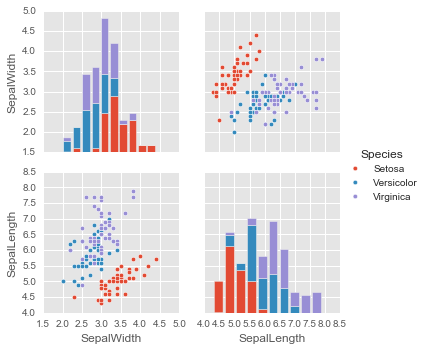

In [25]:
pairs = df[['SepalWidth', 'SepalLength', 'Species']]

import matplotlib.pyplot as plt

# axes = plt.figure(figsize=(18, 5))
sns.pairplot(pairs, hue='Species')

## Part A - Activity | Iris Dataset | Exploratory Data Analysis

In [ ]:
# TODO: Generate scatter plots for each pair of features 

# Hint: use hue='Species' to color points in scatter plot

## Part B - First hand-coded classifier

In [91]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

# Example solution
def my_classifier(dataframe):
    if dataframe['PetalLength'] < 2:
        return 'Setosa'
    else:
        return 'Virginica'

df['predictions'] = df.apply(my_classifier, axis=1)

## Part I:
# 1. Find all instances (rows) with incorrect classifications
# 2. Let's define accuracy as % of correct predictions
#    Q: What is accuracy

# 5 min

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predictions
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
4,5.0,3.6,1.4,0.2,Setosa,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,Virginica
146,6.3,2.5,5.0,1.9,Virginica,Virginica
147,6.5,3.0,5.2,2.0,Virginica,Virginica
148,6.2,3.4,5.4,2.3,Virginica,Virginica


In [ ]:
# Part II:
# Create a classifier that includes all 3 classes and repeat 1
#  - apply test train split (30% in test)

from sklearn.cross_validation import train_test_split

In [ ]:
def my_first_classifier(dataframe):
    # TODO


In [ ]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

In [ ]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

## Part C - Classification metrics

### Accuracy

*Percentage of correctly predicted classes*

In [ ]:
# TODO

### Misclassification rate

*Percentage of incorrectly predicted classes*

In [ ]:
# TODO

## Part D - Activity | Second hand-coded classifier

*Improve your classifier to include all three flower species instead of only Setosa or Virginica*

In [ ]:
def my_second_classifier(row):
    # TODO

In [ ]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [ ]:
sum(y_hat != df.Species)

In [ ]:
(y_hat == df.Species).mean()

## Part E

### Define feature matrix and label vector

In [ ]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df.Species

In [ ]:
X

In [ ]:
y

### K-Nearest Neighbors (KNN)

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

In [ ]:
y_hat = model.predict(X)

In [ ]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

In [ ]:
species_df[species_df.Predicted != species_df.Observed]

In [ ]:
sum(species_df.Predicted != species_df.Observed)

You can measure the precision of your prediction either manually or with `.score()`

In [ ]:
(species_df.Predicted == species_df.Observed).mean()

In [ ]:
model.score(X, y)

# weights = 'uniform'

In [ ]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

# weights = 'distance'

In [ ]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

## Part F - What is the best value for `k`?

In [ ]:
k = range(1, len(df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [ ]:
score_df

In [ ]:
plt.plot(score_df.k, score_df.Score)

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .6, random_state = 0).sort()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

In [ ]:
test_df

The error in the training set is less than the error is the test set

In [ ]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df.Species

print 'test  = ', model.score(test_X, test_y)

In [ ]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [ ]:
score_df

In [ ]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [ ]:
len(train_df)

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

In [ ]:
plt.plot(score_df.k, score_df.Score)

In [ ]:
score_df[score_df.Score == score_df.Score.max()]

In [ ]:
score_df[score_df.Score == score_df.Score.min()]

In [ ]:
gs.score(test_X, test_y)